In [ ]:
# Installations
!pip install dash
!pip install plotly
!pip install numpy
!pip install pyyaml
!pip install gprofiler-official
!pip install statsmodels
!pip install pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 14.9 MB/s eta 0:00:00


In [ ]:
#Import required libraries
import dash
import plotly.graph_objects as go
import numpy as np
import yaml
import os
from gprofiler import GProfiler
import json
import pandas as pd
from statsmodels.stats.multitest import multipletests
from dash import dcc, html, Input, Output, dash_table, State, callback_context
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import matplotlib.pyplot as plt
import re
import seaborn as sns

<ipython-input-2-04041e68e42d>:12: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-2-04041e68e42d>:13: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


# **Files Used**

**You can acces all the files,which were used for testing these codes, through GitHub link:**

https://github.com/eysanmutlu/ENS492-NetworkVisualization.git

**Attention:**

If you encounter any connection issues, dash errors, Google 403 errors, or JavaScript errors, try to use another "port" in the following line of code:


    app.run_server(debug=True, port=8062)

This line is located at the end of the codes


# **Case Scenarion Functions**

**Call function for Sankey Plot 1:**

sankey_plot1("./adj_details_Sert.yaml", "./Sert-communities-Pisces.npy", 3, 0.1, 0.07)

**Call function for Sankey Plot 2:**

sankey_plot2("./adj_details_DA.yaml", "./DA-communities-Pisces.npy", 2, 0.05, 0.07)

**Call function for Interative Histogram Plot:**

histogram_plot("./mus_dynamic_details.yaml-DA-p95.npy", "./DA-communities-Pisces.npy","./adj_details_DA.yaml",12,0)

**Call function for Box and KDE Plots:**

box_kde('./DA-communities-Pisces.npy','./mus_dynamic_details.yaml-DA-p95.npy','./Users/shami',1)

**Attention:** Insted of "./User/shami", please provide the path to your folder, where the data will be saved.

**Call function for Static Gene Network Visualization:**

static_visualization("./DA-communities-Pisces.npy", "./mus_dynamic_details.yaml-DA-p95.npy",14,0)

# **Sankey Plot 1 (General Gene Community Analysis)**


The Sankey Plot code provided below allows users to view gene communities. Users can examine the communities in the datasets they want, especially the communities at the time point (TP) and community ID (C) they choose. The user can examine gene flows from different subjects and time points in the selected specific gene community. Since the given Sankey Diagram is an interactive chart, users can examine the "Number of incoming flows" and "Number of outgoing flows" numbers of their desired community when they hover their mouse over the community IDs. The number of incoming flows represents the total number of different gene flows directed. The number of outgoing flows represents the total number of gene flows directed away from that particular community. Since it is an interactive plot, users can move the flow of the community they choose as they wish with the help of the mouse. For example, when the user selects community 4 (C4) at time point 1 (TP1), the flow of the specifically selected community is shown separately from the others with an orange color, along with the gene flows of other communities under the heading "Gene Flow Visualization" . The communities at time point 1 are shown on the left side of the plot, while the communities at time point 2 are shown on the right side of the plot. Genes from this community spilled into two different communities, C16 and C2, at time point 2. The user can download it if he wishes. The user can download the graphic to his computer in png format by clicking on the camera icon.

**How can user use this Sankey Chart?**

Once the cell is run, the user first selects the desired community and time point from the pop-up window under the heading “Genes in Selected Community.” After selection the user will be able to see the Sankey Chart. For example, if the community wants to choose ID:4 at time point 2, C4 must choose TP2.  

After the selection, lists appear under the title "Gene List" showing the names of the genes in this community and which community the gene flow comes from. For example, when the "Clorf216" gene in the list is examined, C5 (TP1) is written under the "Previous Community" column. This indicates that the Clorf216 gene was in flow from community 5 at time point 1.

Another example is when the user selects community 2 at time point 1 (C2 TP1), N/A is seen in the previous communities of genes. This means that there is no flow from another community to this community.

At the end of the list, users can download this gene list by clicking the "Download Gene List" button if they wish. To do this, they must first enter the path where they want to download the file as input. For example, if the user wants to save it to the "gene list sankey plot 1" folder on the desktop, he can type the path "/Users/eysanmutlu/Desktop/gene list sankey plot 1" as input and press the download button. .

The user will then see the GO Enrichment analyzes of the genes at the selected time point and community ID under the heading "GO Enrichment Results". This analysis was performed with the gprofiler package. The resulting list contains the columns “Go Term,” “Description,” “P-value,” “Adjusted P-value,” and “Genes,” respectively. Go Term is a unique identifier used to classify GO ID, i.e. specific biological functions. The annotation gives a description of the specific biological function that is enriched. The P value represents the statistical significance of the enrichment analysis. Corrected p value is a type of P value used to control for false positive results when performing multiple tests. In the Genes column, users list the names of genes specifically enriched for a particular biological function.

At the end of the list, users can download this GO Enrichment list by clicking the "Download GO Results" button if they wish. To do this, they must first enter the path where they want to download the file as input. For example, if the user wants to save it to the "gene list sankey plot 1" folder on the desktop, he can type the path "/Users/eysanmutlu/Desktop/gene list sankey plot 1" as input and press the download button. .

Furthermore, users see the "GO Enrichment Bar Plot". In this plot, while there are enriched biological functions on the y-axis, the intersection is given to you on the x-axis. The intersection indicates the number of genes in the intersection set of genes in the analyzed gene list and genes belonging to a particular GO term. When the user hovers his mouse over the bars, he will see the adjusted p-value of the biological function. The colors of these bars are colored according to the p.adjust scaling given on the right. If the user wishes, he can download the graphic to his computer in png format by clicking on the camera figure.

Finally, the user can enter the name of the gene he wants as input in the "Search for a Specific Gene" field and click on the search button to view which community and time points that gene is located in. For example, when the user writes the gene "DVL1" as input and clicks on the search button, the user will see the following output:

“Gene 'DVL1' is present in community C 4 at time point TP1.

Gene 'DVL1' is present in community C 1 at time point TP2.”


In [ ]:
def sankey_plot1(name_details, name_community, subject, threshold, p_value_cutoff):
    # Load data
    current_dir = '.'
    adj_details_path = os.path.join(current_dir, name_details)
    community_memberships_path = os.path.join(current_dir, name_community)
    community_memberships = np.load(community_memberships_path, allow_pickle=True)
    with open(adj_details_path, 'r') as file:
        adj_details = yaml.safe_load(file)


    # Prepare data
    num_timepoints = community_memberships.shape[1]
    unique_communities_per_tp = [np.unique(community_memberships[subject, tp]) for tp in range(num_timepoints)]
    gene_to_community = {}
    for tp in range(num_timepoints):
        for community_id in unique_communities_per_tp[tp]:
            for idx in np.where(community_memberships[subject, tp] == community_id)[0]:
                gene = adj_details['gene_indices'][idx]
                if gene not in gene_to_community:
                    gene_to_community[gene] = []
                gene_to_community[gene].append((tp, community_id))


    app = dash.Dash(__name__)

    app.layout = html.Div([
        dcc.Graph(id='sankey-diagram'),
        html.Hr(),
        html.H3('Genes in Selected Community:'),
        dcc.Dropdown(
            id='community-selector',
            options=[
                {'label': f"C {int(cid)} TP{tp + 1}", 'value': json.dumps([int(tp), int(cid)])}
                for tp in range(num_timepoints)
                for cid in unique_communities_per_tp[tp]
            ],
            placeholder='Select a community'
        ),
        html.Div(id='gene-list-container', children=[
            html.H4('Gene List'),
            dash_table.DataTable(
                id='gene-list-table',
                style_table={'overflowX': 'auto'},
                style_cell={'textAlign': 'left'}
            ),
            html.Div([
                dcc.Input(id='gene-list-path', type='text', placeholder='Enter path to save gene list'),
                html.Button('Download Gene List', id='download-gene-list')
            ])
        ]),
        html.Div(id='go-results-container', children=[
            html.H4('GO Enrichment Results'),
            dash_table.DataTable(
                id='go-results-table',
                style_table={'overflowX': 'auto'},
                style_cell={'textAlign': 'left'}
            ),
            html.Div([
                dcc.Input(id='go-results-path', type='text', placeholder='Enter path to save GO results'),
                html.Button('Download GO Results', id='download-go-results')
            ]),
            dcc.Graph(id='go-bar-plot')  # Add a new Graph component for the bar plot
        ]),
        html.H3('Search for a Specific Gene:'),
        dcc.Input(id='gene-search-input', type='text', placeholder='Enter gene name'),
        html.Button('Search', id='gene-search-button'),
        html.Div(id='search-results')
    ])

    @app.callback(
        Output('sankey-diagram', 'figure'),
        [Input('community-selector', 'value')]
    )
    def update_sankey(selected_community):
        sources, targets, values, link_colors, node_colors = [], [], [], [], []
        node_indices = [(tp, cid) for tp in range(num_timepoints) for cid in unique_communities_per_tp[tp]]
        color_map = {node: 0 for node in node_indices}

        if selected_community is not None:
            selected_community = json.loads(selected_community)
            # Calculate Jaccard index for significant overlaps
            for tp in range(num_timepoints - 1):
                for source_cid in unique_communities_per_tp[tp]:
                    genes_in_community_tp1 = np.where(community_memberships[subject, tp] == source_cid)[0]
                    for target_cid in unique_communities_per_tp[tp + 1]:
                        genes_in_community_tp2 = np.where(community_memberships[subject, tp + 1] == target_cid)[0]
                        intersection = np.intersect1d(genes_in_community_tp1, genes_in_community_tp2).size
                        union = np.union1d(genes_in_community_tp1, genes_in_community_tp2).size
                        jaccard_index = intersection / union
                        if jaccard_index >= threshold:
                            sources.append(node_indices.index((tp, source_cid)))
                            targets.append(node_indices.index((tp + 1, target_cid)))
                            values.append(intersection)
                            if (tp, source_cid) == tuple(selected_community) or (tp + 1, target_cid) == tuple(selected_community):
                                link_colors.append('orange')
                                color_map[(tp, source_cid)] = 1
                                color_map[(tp + 1, target_cid)] = 1
                            else:
                                link_colors.append('grey')

        node_colors = ['orange' if color_map[node] == 1 else 'grey' for node in node_indices]
        labels = [f'C {cid} (TP{tp + 1})' for tp in range(num_timepoints) for cid in unique_communities_per_tp[tp]]
        fig = go.Figure(go.Sankey(
            node=dict(
                pad=15,
                thickness=20,
                line=dict(color="black", width=1),  # Set the line color to black with width 1
                label=labels,
                color=node_colors
            ),
            link=dict(source=sources, target=targets, value=values, color=link_colors)
        ))
        fig.update_layout(title_text='Gene Flow Visualization', font_size=10)
        return fig

    @app.callback(
        [Output('gene-list-table', 'data'), Output('gene-list-table', 'columns'),
         Output('go-results-table', 'data'), Output('go-results-table', 'columns'),
         Output('go-bar-plot', 'figure')],
        [Input('community-selector', 'value')]
    )
    def update_tables(selected_community):
        if selected_community is None:
            return [], [], [], [], go.Figure()

        selected_community = json.loads(selected_community)
        tp, community_id = selected_community
        gene_indices = np.where(community_memberships[subject, tp] == community_id)[0]
        gene_names = [adj_details['gene_indices'][idx] for idx in gene_indices]

        # Update gene list table
        if tp > 0:
            previous_communities = unique_communities_per_tp[tp - 1]
            previous_memberships = community_memberships[subject, tp - 1]
            gene_flows = {}

            for idx in gene_indices:
                gene = adj_details['gene_indices'][idx]
                prev_indices = np.where(previous_memberships == previous_memberships[idx])[0]
                if len(prev_indices) > 0:
                    prev_community_idx = prev_indices[0]
                    if previous_memberships[idx] in previous_communities:
                        prev_community = previous_communities[np.where(previous_communities == previous_memberships[idx])[0][0]]
                        gene_flows[gene] = f"C {prev_community} (TP{tp})"
                    else:
                        gene_flows[gene] = "N/A"
                else:
                    gene_flows[gene] = "N/A"
        else:
            gene_flows = {gene: "N/A" for gene in gene_names}

        gene_columns = [{"name": "Gene", "id": "Gene"}, {"name": "Previous Community", "id": "Previous Community"}]
        gene_data = [{"Gene": gene, "Previous Community": gene_flows[gene]} for gene in gene_names]

        # Update GO results table
        gp = GProfiler(return_dataframe=True)
        go_results = gp.profile(organism='hsapiens', query=gene_names, sources=['GO:BP'], user_threshold=p_value_cutoff)

        if go_results.empty:
            go_data, go_columns = [], []
            bar_plot_fig = go.Figure()
        else:
            # Adjust p-values using Benjamini-Hochberg method
            go_results['p_adjust'] = multipletests(go_results['p_value'], method='fdr_bh')[1]

            go_columns = [
                {"name": "GO Term", "id": "go_term"},
                {"name": "Description", "id": "description"},
                {"name": "P-value", "id": "p_value"},
                {"name": "Adjusted P-value", "id": "p_adjust"},
                {"name": "Genes", "id": "genes"}
            ]
            go_data = [
                {
                    "go_term": row['native'],
                    "description": row['name'],
                    "p_value": f"{row['p_value']:.1e}",
                    "p_adjust": f"{row['p_adjust']:.1e}",
                    "genes": ", ".join(gene_names[:row['intersection_size']])
                }
                for _, row in go_results.iterrows() if row['p_adjust'] <= p_value_cutoff
            ]

            # Create the bar plot figure
            bar_plot_fig = go.Figure()
            bar_plot_fig.add_trace(go.Bar(
                x=go_results['intersection_size'],
                y=go_results['name'],
                orientation='h',
                marker=dict(
                    color=go_results['p_adjust'],
                    colorscale='RdYlBu_r',
                    colorbar=dict(title='p.adjust')  # Color bar title
                ),
                text=go_results['p_adjust'].map(lambda x: f"{x:.1e}"),  # Hover text
                hoverinfo='text'
            ))
            bar_plot_fig.update_layout(
                title='GO Enrichment Bar Plot',
                xaxis_title='Intersection Size',
                yaxis_title='GO Term',
                yaxis=dict(autorange='reversed')  # Reverse the y-axis to have the most significant terms at the top
            )

        return gene_data, gene_columns, go_data, go_columns, bar_plot_fig

    @app.callback(
        Output('search-results', 'children'),
        [Input('gene-search-button', 'n_clicks')],
        [State('gene-search-input', 'value')]
    )
    def search_gene(n_clicks, gene_name):
        if n_clicks is None or not gene_name:
            return ""

        if gene_name in gene_to_community:
            occurrences = gene_to_community[gene_name]
            results = [html.Div(f"Gene '{gene_name}' is present in community C {community_id} at time point TP{tp + 1}.")
                       for tp, community_id in occurrences]
            return results
        else:
            return html.Div(f"Gene '{gene_name}' not found in any community.")

    @app.callback(
        Output('download-gene-list', 'n_clicks'),
        [Input('download-gene-list', 'n_clicks')],
        [State('gene-list-table', 'data'), State('gene-list-path', 'value'), State('community-selector', 'value')]
    )
    def download_gene_list(n_clicks, gene_data, path, selected_community):
        if n_clicks and gene_data and path and selected_community:
            try:
                selected_community = json.loads(selected_community)
                tp, community_id = selected_community
                file_name = f"gene_list_C{community_id}_TP{tp+1}.csv"
                if os.path.isdir(path):
                    path = os.path.join(path, file_name)
                elif not path.endswith('.csv'):
                    path = os.path.join(path, file_name)
                df = pd.DataFrame(gene_data)
                df.to_csv(path, index=False)
            except PermissionError:
                return f"PermissionError: Unable to write to {path}. Please check your permissions and try again."
        return n_clicks

    @app.callback(
        Output('download-go-results', 'n_clicks'),
        [Input('download-go-results', 'n_clicks')],
        [State('go-results-table', 'data'), State('go-results-path', 'value'), State('community-selector', 'value')]
    )
    def download_go_results(n_clicks, go_data, path, selected_community):
        if n_clicks and go_data and path and selected_community:
            try:
                selected_community = json.loads(selected_community)
                tp, community_id = selected_community
                file_name = f"go_results_C{community_id}_TP{tp+1}.csv"
                if os.path.isdir(path):
                    path = os.path.join(path, file_name)
                elif not path.endswith('.csv'):
                    path = os.path.join(path, file_name)
                df = pd.DataFrame(go_data)
                df.to_csv(path, index=False)
            except PermissionError:
                return f"PermissionError: Unable to write to {path}. Please check your permissions and try again."
        return n_clicks

    if __name__ == '__main__':
      app.run_server(debug=True, port=8062)

In [ ]:
sankey_plot1("./adj_details_Sert.yaml", "./Sert-communities-Pisces.npy", 3, 0.1, 0.07)

<IPython.core.display.Javascript object>

# **Sankey Plot 2 (Specific Gene Community Analysis)**

The Sankey Plot code given below allows users to see the gene communities they specifically want to examine. Users can individually examine the community in the dataset they want, specifically at the time point (TP) and community ID (C) they choose. The user can examine gene flows at different subjects and time points in the selected specific gene community. Since the given Sankey Diagram is an interactive plot, users can examine the "Incoming flow count" and "Outgoing flow count" numbers of the community they want when they hover their mouse over the community IDs. Incoming flow count represents the total number of distinct gene flows which are directed. Outgoing flow count is representing the total number of gene flows which are directed away from that specific community. Users can scroll the Sankey Plot with their nodes or connection mice and observe the plot in different ways by changing their positions. For example, when the user selects community 4 (C4) at time point 1 (TP1), he will see the Sankey Plot showing only the gene flows of that community under the "Gene Flow Visualization" heading. In this example, only C4 (TP1) appears on the left, that is, in time point 1. The genes in this community flowed into two different communities, C16 and C2, at time point 2.If the user wishes, he can download the plot to his computer in png format by clicking on the camera figure.

**How can user use this Sankey Plot?**

After the cell is run, the user first selects the desired community and time point from the pop-up window under the "Genes in Selected Community" heading. After the selection, user will be able to see the Sankey Plot. For example, if the community at time point 2 wants to select ID:4, C4 must select TP2.  

After the selection, lists appear under the title "Gene List" showing the names of the genes in this community and which community the gene flow comes from. For example, when examining the "Clorf216" gene in the list, C5 (TP1) is written under the "Previous Community" column. This shows that the Clorf216 gene was in flow from community 5 at time point 1.

Another example is; When the user selects community 2 at time point 1 (C2 TP1), N/A is seen in the previous communities of the genes. This means that there is no flow to this community from another community.

At the end of the list, users can download this gene list if they wish by pressing the "Download Gene List" button. To do this, they must first enter the path where they want to download the file as input. For example, if the user wants to save it in the "gene list sankey plot 2" folder on the desktop, they can type the path "/Users/eysanmutlu/Desktop/gene list sankey plot 2" as input and press the download button.

Afterwards, the user will see the GO Enrichment analyzes of the genes in the time point and community ID he selected under the heading "GO Enrichment Results". This analysis was done with the gprofiler packet. The resulting list includes the columns "Go Term", "Description", "P-value", "Adjusted P-value" and "Genes", respectively. Go Term is a unique identifier used to classify GO ID, that is, specific biological functions. Description gives a description of the specific biological function that is enriched. P-value represents the statistical significance of the enrichment analysis. Adjusted p-value is a type of P-value used to control for false positive results when performing multiple testing. In the Genes column, users list the names of genes that are specifically enriched for a given biological function.

At the end of the list, users can download this GO Enrichment list if they wish by pressing the "Download GO Results" button. To do this, they must first enter the path where they want to download the file as input. For example, if the user wants to save it in the "gene list sankey plot 2" folder on the desktop, they can type the path "/Users/eysanmutlu/Desktop/gene list sankey plot 2" as input and press the download button.

Furthermore, users see the "GO Enrichment Bar Plot" visual. In this plot, while there are biological functions enriched on the y-axis, the intersection is given to you on the x-axis. Intersection shows you the number of genes in the intersection set of genes in the analyzed gene list and genes belonging to a particular GO term. When the user hovers his mouse over the bars, he will see the ajdusted p-value value of the biological function. The colors of these bars are colored according to the p.adjust scaling given on the right. If the user wishes, he can download the plot to his computer in png format by clicking on the camera figure.

Finally, the user can enter the name of the gene he wants as input in the "Search for a Specific Gene" field and click on the search button to view which community and time points that gene is located in. For example, when the user writes the gene "DVL1" as input and clicks on the search button, the user will see the following output:

“Gene 'DVL1' is present in community C 4 at time point TP1.

Gene 'DVL1' is present in community C 1 at time point TP2.”


In [ ]:
def sankey_plot2(name_details, name_community, subject, threshold, p_value_cutoff):
  # Load data
  current_dir = '.'
  adj_details_path = os.path.join(current_dir,name_details)
  community_memberships_path = os.path.join(current_dir,name_community)
  community_memberships = np.load(community_memberships_path, allow_pickle=True)
  with open(adj_details_path, 'r') as file:
      adj_details = yaml.safe_load(file)



  # Prepare data
  num_timepoints = community_memberships.shape[1]
  unique_communities_per_tp = [np.unique(community_memberships[subject, tp]) for tp in range(num_timepoints)]
  gene_to_community = {}
  for tp in range(num_timepoints):
      for community_id in unique_communities_per_tp[tp]:
          for idx in np.where(community_memberships[subject, tp] == community_id)[0]:
              gene = adj_details['gene_indices'][idx]
              if gene not in gene_to_community:
                  gene_to_community[gene] = []
              gene_to_community[gene].append((tp, community_id))



  # Calculate the size of each community and sort
  community_sizes = {}
  for tp in range(num_timepoints):
      for community_id in unique_communities_per_tp[tp]:
          size = np.sum(community_memberships[subject, tp] == community_id)
          community_sizes[(tp, community_id)] = size

  # Sort communities by size in decreasing order
  sorted_communities = {tp: sorted(unique_communities_per_tp[tp], key=lambda cid: community_sizes[(tp, cid)], reverse=True) for tp in range(num_timepoints)}

  app = dash.Dash(__name__)

  app.layout = html.Div([
      dcc.Graph(id='sankey-diagram'),
      html.Hr(),
      html.H3('Genes in Selected Community:'),
      dcc.Dropdown(
          id='community-selector',
          options=[
              {'label': f"C {int(cid)} TP{tp + 1}", 'value': json.dumps([int(tp), int(cid)])}
              for tp in range(num_timepoints)
              for cid in unique_communities_per_tp[tp]
          ],
          placeholder='Select a community'
      ),
      html.Div(id='gene-list-container', children=[
          html.H4('Gene List'),
          dash_table.DataTable(
              id='gene-list-table',
              style_table={'overflowX': 'auto'},
              style_cell={'textAlign': 'left'}
          ),
          html.Div([
              dcc.Input(id='gene-list-path', type='text', placeholder='Enter path to save gene list'),
              html.Button('Download Gene List', id='download-gene-list')
          ])
      ]),
      html.Div(id='go-results-container', children=[
          html.H4('GO Enrichment Results'),
          dash_table.DataTable(
              id='go-results-table',
              style_table={'overflowX': 'auto'},
              style_cell={'textAlign': 'left'}
          ),
          html.Div([
              dcc.Input(id='go-results-path', type='text', placeholder='Enter path to save GO results'),
              html.Button('Download GO Results', id='download-go-results')
          ]),
          dcc.Graph(id='go-bar-plot')  # Add a new Graph component for the bar plot
      ]),
      html.H3('Search for a Specific Gene:'),
      dcc.Input(id='gene-search-input', type='text', placeholder='Enter gene name'),
      html.Button('Search', id='gene-search-button'),
      html.Div(id='search-results')
  ])

  @app.callback(
      Output('sankey-diagram', 'figure'),
      [Input('community-selector', 'value')]
  )
  def update_sankey(selected_community):
      sources, targets, values, link_colors, node_colors = [], [], [], [], []
      node_indices = [(tp, cid) for tp in range(num_timepoints) for cid in sorted_communities[tp]]
      color_map = {node: 0 for node in node_indices}

      # Initially, show all communities with significant overlaps
      for tp in range(num_timepoints - 1):
          for source_cid in sorted_communities[tp]:
              genes_in_community_tp1 = np.where(community_memberships[subject, tp] == source_cid)[0]
              for target_cid in sorted_communities[tp + 1]:
                  genes_in_community_tp2 = np.where(community_memberships[subject, tp + 1] == target_cid)[0]
                  intersection = np.intersect1d(genes_in_community_tp1, genes_in_community_tp2).size
                  union = np.union1d(genes_in_community_tp1, genes_in_community_tp2).size
                  jaccard_index = intersection / union
                  if jaccard_index >= threshold:
                      sources.append(node_indices.index((tp, source_cid)))
                      targets.append(node_indices.index((tp + 1, target_cid)))
                      values.append(intersection)
                      link_colors.append('grey')

      # Highlight selected community and its overlaps
      if selected_community is not None:
          selected_community = json.loads(selected_community)
          tp_selected, community_id_selected = selected_community
          # Filter only the overlaps with the selected community
          filtered_sources, filtered_targets, filtered_values, filtered_link_colors = [], [], [], []
          for i in range(len(sources)):
              source_tp, source_cid = node_indices[sources[i]]
              target_tp, target_cid = node_indices[targets[i]]
              if (source_tp == tp_selected and source_cid == community_id_selected) or (target_tp == tp_selected and target_cid == community_id_selected):
                  filtered_sources.append(sources[i])
                  filtered_targets.append(targets[i])
                  filtered_values.append(values[i])
                  filtered_link_colors.append('orange')
                  color_map[(source_tp, source_cid)] = 1
                  color_map[(target_tp, target_cid)] = 1

          sources, targets, values, link_colors = filtered_sources, filtered_targets, filtered_values, filtered_link_colors

      node_colors = ['orange' if color_map[node] == 1 else 'grey' for node in node_indices]
      labels = [f'C {cid} (TP{tp + 1})' for tp in range(num_timepoints) for cid in sorted_communities[tp]]
      fig = go.Figure(go.Sankey(
          node=dict(
              pad=15,
              thickness=20,
              line=dict(color="rgba(0,0,0,0)", width=0),  # Set the line color to transparent
              label=labels,
              color=node_colors
          ),
          link=dict(source=sources, target=targets, value=values, color=link_colors)
      ))
      fig.update_layout(title_text='Gene Flow Visualization', font_size=10)
      return fig

  @app.callback(
      Output('community-selector', 'options'),
      [Input('community-selector', 'value')]
  )
  def update_community_options(selected_community):
      return [
          {'label': f"C {int(cid)} TP{tp + 1}", 'value': json.dumps([int(tp), int(cid)])}
          for tp in range(num_timepoints)
          for cid in unique_communities_per_tp[tp]
      ]

  @app.callback(
      [Output('gene-list-table', 'data'), Output('gene-list-table', 'columns'),
      Output('go-results-table', 'data'), Output('go-results-table', 'columns'),
      Output('go-bar-plot', 'figure')],
      [Input('community-selector', 'value')]
  )
  def update_tables(selected_community):
      if selected_community is None:
          return [], [], [], [], go.Figure()

      selected_community = json.loads(selected_community)
      tp, community_id = selected_community
      gene_indices = np.where(community_memberships[subject, tp] == community_id)[0]
      gene_names = [adj_details['gene_indices'][idx] for idx in gene_indices]

      # Update gene list table
      if tp > 0:
          previous_communities = sorted_communities[tp - 1]
          previous_memberships = community_memberships[subject, tp - 1]
          gene_flows = {}

          for idx in gene_indices:
              gene = adj_details['gene_indices'][idx]
              prev_indices = np.where(previous_memberships == previous_memberships[idx])[0]
              if len(prev_indices) > 0:
                  prev_community_idx = prev_indices[0]
                  if previous_memberships[idx] in previous_communities:
                      prev_community = previous_communities[np.where(previous_communities == previous_memberships[idx])[0][0]]
                      gene_flows[gene] = f"C {prev_community} (TP{tp})"
                  else:
                      gene_flows[gene] = "N/A"
              else:
                  gene_flows[gene] = "N/A"
      else:
          gene_flows = {gene: "N/A" for gene in gene_names}

      gene_columns = [{"name": "Gene", "id": "Gene"}, {"name": "Previous Community", "id": "Previous Community"}]
      gene_data = [{"Gene": gene, "Previous Community": gene_flows[gene]} for gene in gene_names]

      # Update GO results table
      gp = GProfiler(return_dataframe=True)
      go_results = gp.profile(organism='hsapiens', query=gene_names, sources=['GO:BP'], user_threshold=p_value_cutoff)

      if go_results.empty:
          go_data, go_columns = [], []
          bar_plot_fig = go.Figure()
      else:
          # Adjust p-values using Benjamini-Hochberg method
          go_results['p_adjust'] = multipletests(go_results['p_value'], method='fdr_bh')[1]

          go_columns = [
              {"name": "GO Term", "id": "go_term"},
              {"name": "Description", "id": "description"},
              {"name": "P-value", "id": "p_value"},
              {"name": "Adjusted P-value", "id": "p_adjust"},
              {"name": "Genes", "id": "genes"}
          ]
          go_data = [
              {
                  "go_term": row['native'],
                  "description": row['name'],
                  "p_value": f"{row['p_value']:.1e}",
                  "p_adjust": f"{row['p_adjust']:.1e}",
                  "genes": ", ".join(gene_names[:row['intersection_size']])
              }
              for _, row in go_results.iterrows() if row['p_adjust'] <= p_value_cutoff
          ]

          # Create the bar plot figure
          bar_plot_fig = go.Figure()
          bar_plot_fig.add_trace(go.Bar(
              x=go_results['intersection_size'],
              y=go_results['name'],
              orientation='h',
              marker=dict(
                  color=go_results['p_adjust'],
                  colorscale='RdYlBu_r',
                  colorbar=dict(title='p.adjust')  # Color bar title
              ),
              text=go_results['p_adjust'].map(lambda x: f"{x:.1e}"),  # Hover text
              hoverinfo='text'
          ))
          bar_plot_fig.update_layout(
              title='GO Enrichment Bar Plot',
              xaxis_title='Intersection Size',
              yaxis_title='GO Term',
              yaxis=dict(autorange='reversed')  # Reverse the y-axis to have the most significant terms at the top
          )

      return gene_data, gene_columns, go_data, go_columns, bar_plot_fig

  @app.callback(
      Output('search-results', 'children'),
      [Input('gene-search-button', 'n_clicks')],
      [State('gene-search-input', 'value')]
  )
  def search_gene(n_clicks, gene_name):
      if n_clicks is None or not gene_name:
          return ""

      if gene_name in gene_to_community:
          occurrences = gene_to_community[gene_name]
          results = [html.Div(f"Gene '{gene_name}' is present in community C {community_id} at time point TP{tp + 1}.")
                    for tp, community_id in occurrences]
          return results
      else:
          return html.Div(f"Gene '{gene_name}' not found in any community.")

  @app.callback(
      Output('download-gene-list', 'n_clicks'),
      [Input('download-gene-list', 'n_clicks')],
      [State('gene-list-table', 'data'), State('gene-list-path', 'value'), State('community-selector', 'value')]
  )
  def download_gene_list(n_clicks, gene_data, path, selected_community):
      if n_clicks and gene_data and path and selected_community:
          try:
              selected_community = json.loads(selected_community)
              tp, community_id = selected_community
              file_name = f"gene_list_C{community_id}_TP{tp+1}.csv"
              if os.path.isdir(path):
                  path = os.path.join(path, file_name)
              elif not path.endswith('.csv'):
                  path = os.path.join(path, file_name)
              df = pd.DataFrame(gene_data)
              df.to_csv(path, index=False)
          except PermissionError:
              return f"PermissionError: Unable to write to {path}. Please check your permissions and try again."
      return n_clicks

  @app.callback(
      Output('download-go-results', 'n_clicks'),
      [Input('download-go-results', 'n_clicks')],
      [State('go-results-table', 'data'), State('go-results-path', 'value'), State('community-selector', 'value')]
  )
  def download_go_results(n_clicks, go_data, path, selected_community):
      if n_clicks and go_data and path and selected_community:
          try:
              selected_community = json.loads(selected_community)
              tp, community_id = selected_community
              file_name = f"go_results_C{community_id}_TP{tp+1}.csv"
              if os.path.isdir(path):
                  path = os.path.join(path, file_name)
              elif not path.endswith('.csv'):
                  path = os.path.join(path, file_name)
              df = pd.DataFrame(go_data)
              df.to_csv(path, index=False)
          except PermissionError:
              return f"PermissionError: Unable to write to {path}. Please check your permissions and try again."
      return n_clicks

  if __name__ == '__main__':
    app.run_server(debug=True, port=8063)


In [ ]:
sankey_plot2("./adj_details_DA.yaml", "./DA-communities-Pisces.npy", 2, 0.05, 0.07)

<IPython.core.display.Javascript object>

# **Interactive Histogram Plot**

**How the user can use this histogram plot?**

In this given example, statistical analysis of "DA cell type" and its Histogram Plot is given. After the cell is run the user will see a histogram plot and header of the chosen subject and time point, along with information about the mean size and standard deviation of all communities. "Mean size" is the average number of genes in the communities. It is calculated by summing the number of genes in each community and then dividing by the total number of communities. "Standard deviation" measures the amount of variation or dispersion in the gene counts of the communities. A low standard deviation means that the gene counts are generally close to the mean, while a high standard deviation indicates that the gene counts vary widely from the mean. On the histogram plot, each bar represents a community, and communities with a gene count lower than 5 are excluded. When user hover over a bar, it provides additional information about the community, as a pop-up, including Community ID, number of genes, and average degree. In order to see the full gene list of desired community, user has to click on the bar, and the gene list will be provided under the plot.  For example, the header will show "Subject 6, Time Point 1 (Mean Size: 177.73, Std. Dev: 153.63)" and pop-up of the bar will look like this "Community ID = 1", "Number of genes = 566", and "Average Degree = 11.26".  Example of a gene list: "Genes in selected community (Community ID 1):

RP11-54O7.1

AGRN

DVL1

GPR153

NOL9

UTS2

DHRS3

DNAJC16

WNT4

RP4-594I10.3

SEPN1

ZDHHC18"

In [ ]:
def histogram_plot(adjacency_matrix_path, community_memberships_path,adj_details_path,subject,time_point):

  def load_adj_details(filename):
      with open(filename, 'r') as file:
          return yaml.load(file, Loader=yaml.FullLoader)

  def calculate_average_degree(adjacency_matrix, community_memberships):
      average_degrees = {}
      unique_communities = np.unique(community_memberships)
      for community in unique_communities:
          nodes_in_community = np.where(community_memberships == community)[0]
          community_submatrix = adjacency_matrix[np.ix_(nodes_in_community, nodes_in_community)]
          degrees = np.sum(community_submatrix, axis=1)
          average_degree = np.mean(degrees)
          average_degrees[community] = average_degree
      return average_degrees

  def get_genes_in_community(community_id, adj_details, community_memberships):
      nodes_in_community = np.where(community_memberships == community_id)[0]
      gene_names = [adj_details['gene_indices'][idx] for idx in nodes_in_community]
      return gene_names

  app = dash.Dash(__name__)




  adj_details = load_adj_details(adj_details_path)
  adjacency_matrix = np.load(adjacency_matrix_path, allow_pickle=True)
  community_memberships = np.load(community_memberships_path, allow_pickle=True)




  adj_matrix_for_calculation = adjacency_matrix[subject, time_point]
  community_memberships_for_calculation = community_memberships[subject, time_point]
  average_degrees = calculate_average_degree(adj_matrix_for_calculation, community_memberships_for_calculation)
  unique_communities, counts = np.unique(community_memberships_for_calculation, return_counts=True)
  mean_size = np.mean(counts)
  std_dev = np.std(counts)

  df = pd.DataFrame({
      'Community ID': unique_communities,
      'Count': counts,
      'Average Degree': [average_degrees[community] for community in unique_communities]
  })

  # Filter out communities with less than 5 genes and sort by the number of genes in descending order
  df_filtered = df[df['Count'] >= 5].sort_values(by='Count', ascending=False).reset_index(drop=True)
  # Add a new column for plotting that represents continuous sequence numbers based on the new order
  df_filtered['Plot ID'] = df_filtered.index + 1

  app.layout = html.Div([
      html.H3(f'Subject {subject + 1}, Time Point {time_point + 1} (Mean Size: {mean_size:.2f}, Std. Dev: {std_dev:.2f})'),
      dcc.Graph(
          id='community-histogram',
          figure=px.bar(df_filtered, x='Plot ID', y='Count',
                        hover_data={'Community ID': True, 'Count': True, 'Average Degree': ':.2f'},
                        labels={'Plot ID': 'Community ID', 'Count': 'Number of Genes', 'Average Degree': 'Average Degree'}
                ).update_layout(
                    plot_bgcolor='white',  # Sets the plot background to white
                    paper_bgcolor='white',  # Sets the surrounding paper area to white
                    )
      ),
      html.Pre(id='gene-list', style={"white-space": "pre-line"})
  ])

  @app.callback(
      Output('gene-list', 'children'),
      [Input('community-histogram', 'clickData')]
  )
  def display_genes(clickData):
      if clickData is None:
          return 'Click on a bar to display genes from that community.'
      else:
          plot_id = clickData['points'][0]['x']
          # Map the plot ID back to the original Community ID
          community_id = df_filtered[df_filtered['Plot ID'] == plot_id]['Community ID'].values[0]
          gene_names = get_genes_in_community(community_id, adj_details, community_memberships_for_calculation)
          return "Genes in selected community (Community ID " + str(community_id) + "):\n" + "\n".join(gene_names)

  if __name__ == '__main__':
      app.run_server(debug=True)


In [ ]:
histogram_plot("./mus_dynamic_details.yaml-DA-p95.npy", "./DA-communities-Pisces.npy","./adj_details_DA.yaml",12,0)

<IPython.core.display.Javascript object>

# **Box Plot and Kernel Distribution Estimation of Average Community Size**

**How can user use this box plot of average community size?**

The interquartile range (IQR), which includes the 50% of the data, is represented by the box. The box's upper and lower margins correspond to the first (Q1) and third (Q3) quartiles, respectively. Line within the box represents the data's median (Q2). Red dots indicate each communiti. The red dots on the line in the box show communities with median values. The red dots in the box represent communities with the number of genes between 100 and 120. The two lines (whiskers) outside the box indicate the smallest and largest values within the range of 1.5 times the IQR. Red dots outside these whiskers represent outlier communities. For example, the average number of genes in the communities found in Time Point 2 of the DA cell type is 110.

**How can user use this Kernel Distribution Estimation Plot?**

This plot gives the average community size distribution of the communities at time point 2 of the Da cell type. "Average Community Size" is on the X-axis, and "Density" is on the Y-axis. Peaks represent where the values are mostly concentrated. For example, the first peak has a value of 105 and the second peak has a value of 150. This implies that the average community size in this dataset has two common ranges, suggesting a possible grouping or clustering within the data.

Once the user runs the cell the .csv file will be downloaded automatically, which contains a full data about all the communities in selected time point. These are: Standard Deviation, Maximum Community Size, Minimum Community Size, Maximum Average Degree, Minimum Average Degree, Average Community Size, and Communities < 5 genes(Lower than 5 genes).

In [ ]:


def box_kde(community_filename, matrice_name,directory,time_point):
  def calculate_average_degree(adjacency_matrix, community_memberships):
      average_degrees = {}
      unique_communities = np.unique(community_memberships)
      for community in unique_communities:
          nodes_in_community = np.where(community_memberships == community)[0]
          community_submatrix = adjacency_matrix[np.ix_(nodes_in_community, nodes_in_community)]
          degrees = np.sum(community_submatrix, axis=1)
          average_degree = np.mean(degrees)
          average_degrees[community] = average_degree
      return average_degrees

  def process_data(adj_matrices, community_mships, time_pt):
      data_list = []
      for subject in range(adj_matrices.shape[0]):
          adjacency_matrix = adj_matrices[subject, time_pt]
          memberships = community_mships[subject, time_pt]
          community_sizes = np.array([np.sum(memberships == community) for community in np.unique(memberships)])
          average_degrees = calculate_average_degree(adjacency_matrix, memberships)
          std_dev = np.std(community_sizes)
          max_community_size = np.max(community_sizes)
          min_community_size = np.min(community_sizes[community_sizes > 0])
          max_avg_degree = np.max(list(average_degrees.values()))
          min_avg_degree = np.min(list(average_degrees.values()))
          avg_community_size = np.mean(community_sizes)
          small_communities_count = np.sum(community_sizes < 5)
          data_list.append([subject + 1, std_dev, max_community_size, min_community_size,
                            max_avg_degree, min_avg_degree, avg_community_size, small_communities_count])
      columns = ["Subject number", "Standard Deviation", "Maximum community size", "Minimum community size",
                "Maximum average degree", "Minimum average degree", "Average community size", "Communities < 5 genes"]
      df = pd.DataFrame(data_list, columns=columns)
      df = df.round(2)
      return df

  def extract_cell_type_from_filename(filename):
      match = re.search(r"(\w+)-communities", filename)
      return match.group(1) if match else "unknown"


  cell_type = extract_cell_type_from_filename(community_filename)

  try:
      new_adjacency_matrices = np.load(matrice_name, allow_pickle=True)
      new_community_memberships = np.load(community_filename, allow_pickle=True)
  except FileNotFoundError as e:
      print(f"Error loading files: {e}")
      raise SystemExit



  os.makedirs(directory, exist_ok=True)

  df = process_data(new_adjacency_matrices, new_community_memberships, time_point)
  output_file_path = os.path.join(directory, f'{cell_type}_community_data_time_point_{time_point + 1}.csv')
  df.to_csv(output_file_path, index=False)

  sns.set_style("white")  # Set the background style
  sns.set_context("talk")  # Set the scale of the plot elements and labels

  plt.figure(figsize=(10, 6))
  sns.boxplot(y=df['Average community size'], color='lightblue')
  sns.stripplot(y=df['Average community size'], color='red', jitter=0.2, size=6, linewidth=1)
  plt.title(f'Box Plot of Average Community Size - {cell_type}, Time Point {time_point + 1}')
  plt.ylabel('Average Community Size')
  plt.show()

  plt.figure(figsize=(10, 6))
  sns.kdeplot(df['Average community size'], bw_adjust=0.5)
  plt.title(f'Distribution of Average Community Sizes - {cell_type}, Time Point {time_point + 1}')
  plt.xlabel('Average Community Size')
  plt.ylabel('Density')
  plt.show()

  print(f"File saved: {output_file_path}")


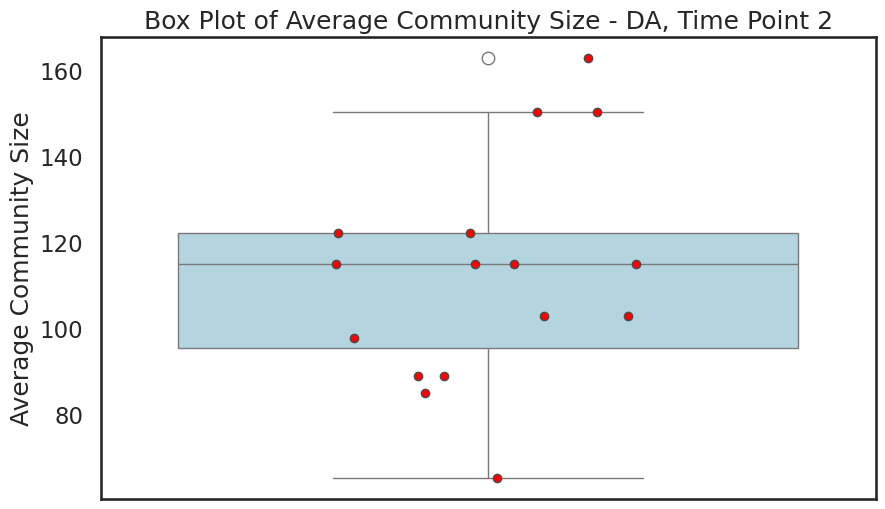

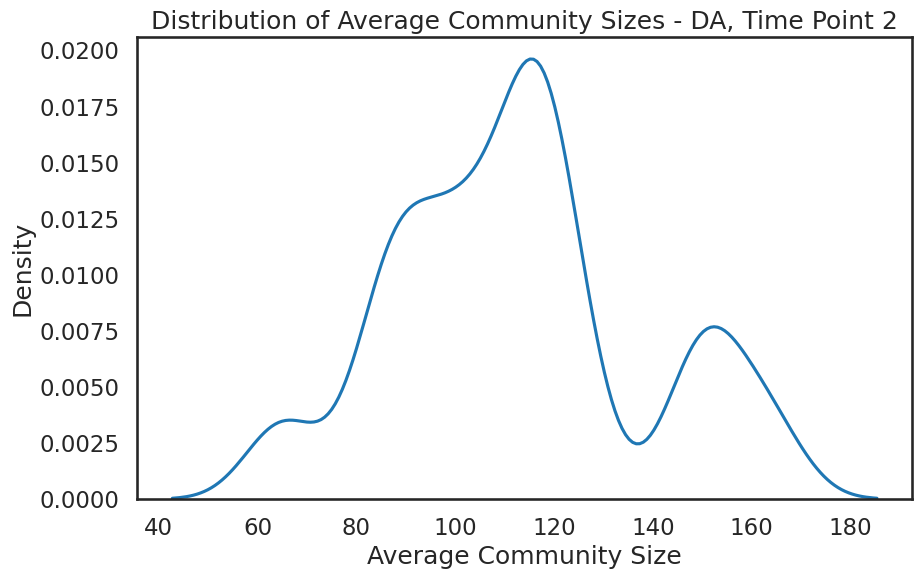

File saved: ./Users/shami/DA_community_data_time_point_2.csv


In [ ]:
box_kde('./DA-communities-Pisces.npy','./mus_dynamic_details.yaml-DA-p95.npy','./Users/shami',1)

# **Static Gene Network Visualization**

**How can user use this Static Gene Network Visualization?**

The aim of this Visualization is to display many subjects and timepoints in a satic manner. For example, the 15th subject and Time Point 1 network of the DA cell type data set were visualized in a static manner. For this, Networkx module and Spring layout were used. Each node represents a gene, and the light gray lines represent edges. In this way, connections between genes can be visualized. Each different color group represents a community of genes. It is observed that different clusters form in different regions of the visualization. For example, a green cluster appears at the bottom of the image, an orange cluster appears on the left, and a yellow cluster appears at the top. Some genes are located further from the center.

In [ ]:
def static_visualization(community_labels_path, adjacency_matrix_path,subject_index,time_point):

  # Load the community labels and adjacency matrix

  c = np.load(community_labels_path)
  nw = np.load(adjacency_matrix_path)

  # Function to generate a consistent colormap
  def get_color_map(labels):
      unique_labels = np.unique(labels)
      colors = plt.cm.tab20(np.linspace(0, 1, len(unique_labels)))
      return {label: color for label, color in zip(unique_labels, colors)}



  cell_type = os.path.basename(community_labels_path).split('-')[0]

  # Construct the title string
  title_str = f"Cell Type: {cell_type}, Subject Index: {subject_index + 1}, Time Point: {time_point + 1}"




  # Get community labels for the selected subject and time point
  community_labels = c[subject_index, time_point]

  # Generate a consistent color map for the current community labels
  color_map = get_color_map(community_labels)
  node_colors = [color_map[label] for label in community_labels]

  # Create a graph from the adjacency matrix for the selected subject and time point
  G = nx.from_numpy_array(nw[subject_index, time_point], create_using=nx.Graph)

  # Compute positions for each node using Spring layout for better visualization
  pos = nx.spring_layout(G)

  # Drawing the graph
  plt.figure(figsize=(10, 8))  # Set the figure size for better visualization
  nx.draw_networkx_edges(G, pos=pos, width=0.02)
  nx.draw_networkx_nodes(G, pos=pos, node_size=10, node_color=node_colors)
  plt.title(title_str)
  # Optional: Remove axis for cleaner look
  plt.axis('off')

  # Show plot
  plt.show()


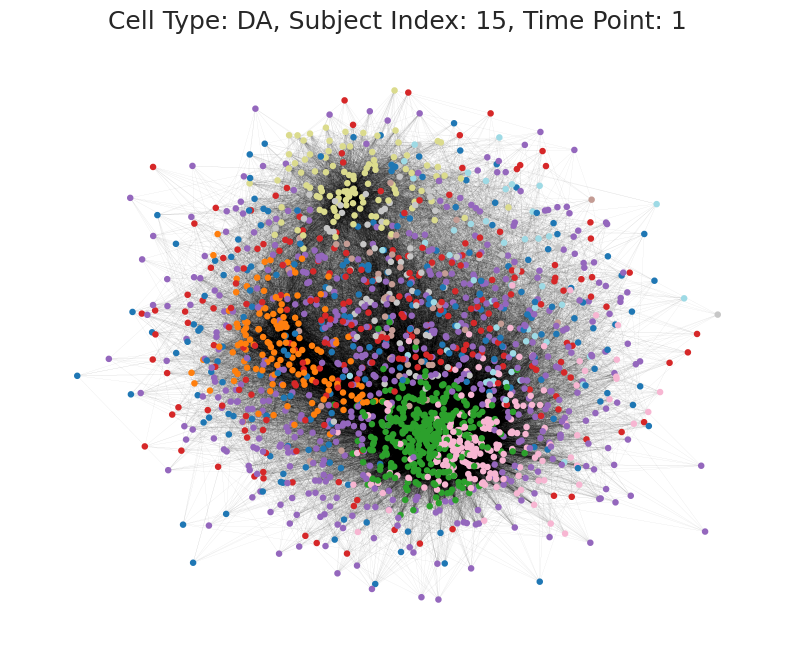

In [ ]:
static_visualization("./DA-communities-Pisces.npy", "./mus_dynamic_details.yaml-DA-p95.npy",14,0)